# Classification

## Perceptron

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame({'sleep_proportion':[0.2, 0.4, 0.5, 0.7], 
                   'grumpy_proportion':[0.1, 0.6, 0.2, 0.9], 
                   'prediction':['kitten', 'kitten', 
                                 'kitten', 'adult']})
df.head()

,sleep_proportion,grumpy_proportion,prediction
0,0.2,0.1,kitten
1,0.4,0.6,kitten
2,0.5,0.2,kitten
3,0.7,0.9,adult


   sleep_proportion  grumpy_proportion prediction
0               0.2                0.1     kitten
1               0.4                0.6     kitten
2               0.5                0.2     kitten
   sleep_proportion  grumpy_proportion prediction
3               0.7                0.9      adult


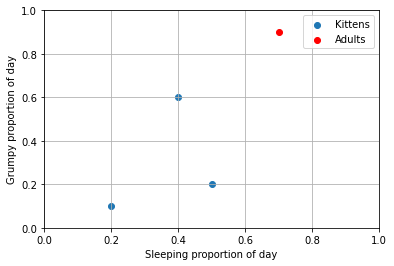

In [4]:
kittens = df[df['prediction'] == 'kitten']
adults = df[df['prediction'] == 'adult']
print(kittens)
print(adults)

plt.scatter(kittens['sleep_proportion'],
            kittens['grumpy_proportion'], 
            label='Kittens')
plt.scatter(adults['sleep_proportion'],
            adults['grumpy_proportion'], 
            color='r', label='Adults')
plt.xlabel("Sleeping proportion of day")
plt.ylabel("Grumpy proportion of day")
plt.legend()
plt.axis([0,1,0,1])
plt.grid()

In [5]:
df['bprediction'] = df['prediction'].apply(
    lambda x: x == 'kitten')

from sklearn.linear_model import Perceptron

classifier = Perceptron(max_iter=1000)
model = classifier.fit(df[['sleep_proportion',
                           'grumpy_proportion']], 
                       df['bprediction'])
df

,sleep_proportion,grumpy_proportion,prediction,bprediction
0,0.2,0.1,kitten,True
1,0.4,0.6,kitten,True
2,0.5,0.2,kitten,True
3,0.7,0.9,adult,False


In [6]:
print(model.predict([[0.2,0.1]]))
print(model.predict([[0.7,0.9]]))
print(model.predict([[0.5,0.5],[0.9,0.9]]))

[ True]
[False]
[ True False]


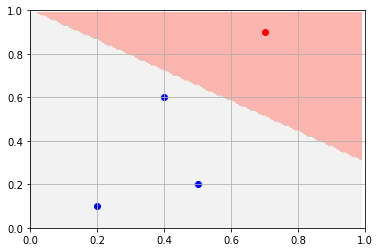

In [7]:
import numpy as np 

x_min, x_max = 0, 1
y_min, y_max = 0, 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# print(xx)
#print(yy)

xx_lin = xx.ravel()
# print(xx_lin)
yy_lin = yy.ravel()
#print(yy_lin)

pred_input = np.c_[xx_lin, yy_lin]
# print(pred_input)

Z = model.predict(pred_input)
#print(Z)
Z = Z.reshape(xx.shape)
#print(Z)

# Contourf fills the area. It requires 2 dim array
plt.contourf(xx,yy,Z, cmap = plt.cm.Pastel1)

plt.scatter(kittens['sleep_proportion'],
            kittens['grumpy_proportion'], 
            color='b', label='Kittens')
plt.scatter(adults['sleep_proportion'],
            adults['grumpy_proportion'], 
            color='r', label='Adults')
plt.axis([0,1,0,1])
plt.grid()

In [8]:
print(model.coef_)

[[-0.7 -1. ]]


In [9]:
print(model.intercept_)

[1.]


In [10]:
from sklearn.metrics import confusion_matrix

actual = df['bprediction']
pred = model.predict(df[['sleep_proportion','grumpy_proportion']])
print(confusion_matrix(actual, pred))

[[1 0]
 [0 3]]


In [11]:
from sklearn.metrics import classification_report

actual = df['bprediction']
pred = model.predict(df[['sleep_proportion','grumpy_proportion']])
print(classification_report(actual, pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00         1
        True       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



## SVM

In [12]:
from sklearn.svm import SVC

SVCClassifier = SVC(kernel='linear',C = 10, max_iter=5)

SVCModel = SVCClassifier.fit(df[['sleep_proportion',
                                 'grumpy_proportion']], 
                       df['bprediction'])

In [13]:
print(SVCModel.predict([[0.2,0.1]]))
print(SVCModel.predict([[0.7,0.9]]))
print(SVCModel.predict([[0.5,0.5],[0.9,0.9]]))

[ True]
[False]
[ True False]


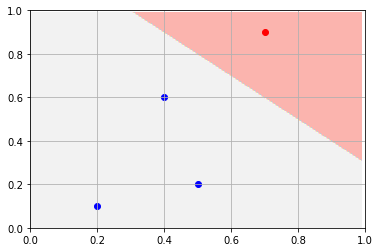

In [14]:
Z = SVCModel.predict(pred_input)
#print(Z)
Z = Z.reshape(xx.shape)
#print(Z)

# Contourf fills the area. It requires 2 dim array
plt.contourf(xx,yy,Z, cmap = plt.cm.Pastel1)

plt.scatter(kittens['sleep_proportion'],
            kittens['grumpy_proportion'], 
            color='b', label='Kittens')
plt.scatter(adults['sleep_proportion'],
            adults['grumpy_proportion'], 
            color='r', label='Adults')
plt.axis([0,1,0,1])
plt.grid()

In [15]:
print(SVCModel.coef_)

[[-3. -3.]]


In [16]:
print(SVCModel.intercept_)

[3.89999986]


In [17]:
print(SVCModel.support_vectors_)

[[0.7 0.9]
 [0.4 0.6]]


In [18]:
from sklearn.metrics import confusion_matrix

actual = df['bprediction']
pred = SVCModel.predict(df[['sleep_proportion','grumpy_proportion']])
print(confusion_matrix(actual, pred))

[[1 0]
 [0 3]]


In [19]:
from sklearn.metrics import classification_report

actual = df['bprediction']
pred = model.predict(df[['sleep_proportion','grumpy_proportion']])
print(classification_report(actual, pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00         1
        True       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



## Confusion Matrix

In [20]:
# For Binary Classification Boolean data
from sklearn.metrics import confusion_matrix

actual = np.array([True,True,False,True])
pred = np.array([True,True,False,False])

print(confusion_matrix(actual, pred, labels = [True,False])) # labels changes the position of classes in confusion matrix

[[2 1]
 [0 1]]


In [21]:
# For Binary Classification Categorial data
from sklearn.metrics import confusion_matrix

actual = np.array(['Dog','Cat','Dog','Dog','Cat'])
pred = np.array(['Dog','Dog','Dog','Cat','Cat'])

print(confusion_matrix(actual, pred, labels = ['Cat','Dog']))

[[1 1]
 [1 2]]


In [22]:
# For Multi-class Classification data
from sklearn.metrics import confusion_matrix

actual = np.array([0,0,1,1,1,1,1,2,2,2,2,2,2,2,0,1])
pred = np.array([0,1,1,2,1,2,1,2,2,2,2,1,1,1,0,1])

print(confusion_matrix(actual, pred, labels = [0,1,2]))

[[2 1 0]
 [0 4 2]
 [0 3 4]]


## Classification Report

In [23]:
from sklearn.metrics import classification_report

actual = np.array([True,True,False,True])
pred = np.array([True,True,False,False])

print(classification_report(actual, pred, target_names = ['Class False','Class True']))

# Target names assigns the name to classes in report if required
# Only string data supported
# If not mentioned, default class name is assigned

              precision    recall  f1-score   support

 Class False       0.50      1.00      0.67         1
  Class True       1.00      0.67      0.80         3

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



In [24]:
from sklearn.metrics import classification_report

actual = np.array(['Dog','Cat','Dog','Dog','Cat'])
pred = np.array(['Dog','Dog','Dog','Cat','Cat'])

print(classification_report(actual, pred, target_names = ['Cat','Dog']))

              precision    recall  f1-score   support

         Cat       0.50      0.50      0.50         2
         Dog       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



In [25]:
from sklearn.metrics import classification_report

actual = np.array([0,0,1,1,1,1,1,2,2,2,2,2,2,2,0,1])
pred = np.array([0,1,1,2,1,2,1,2,2,2,2,1,1,1,0,1])

print(classification_report(actual, pred, target_names = ['Class 0','Class 1', 'Class 2']))

              precision    recall  f1-score   support

     Class 0       1.00      0.67      0.80         3
     Class 1       0.50      0.67      0.57         6
     Class 2       0.67      0.57      0.62         7

    accuracy                           0.62        16
   macro avg       0.72      0.63      0.66        16
weighted avg       0.67      0.62      0.63        16

